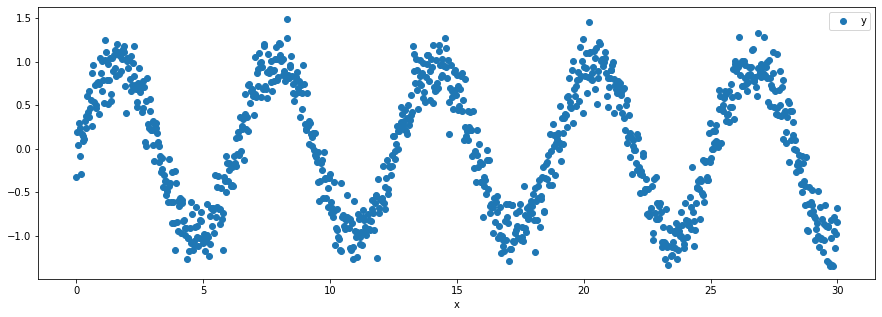

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
import tensorflow as tf

def create_dataframe(start, stop, n_samples):
    # intialise dataframe
    df = pd.DataFrame({
        'x':np.linspace(start, stop, n_samples)
    })
    # create response
    df['y'] = create_sin_wave_with_noise(df['x'])
    return df

def create_sin_wave_with_noise(t):
    e = np.random.normal(0, 0.2, len(t))
    return np.sin(t) + e

df = create_dataframe(0, 30, 1001)
df.plot('x','y', figsize=(15,5), style='o')  

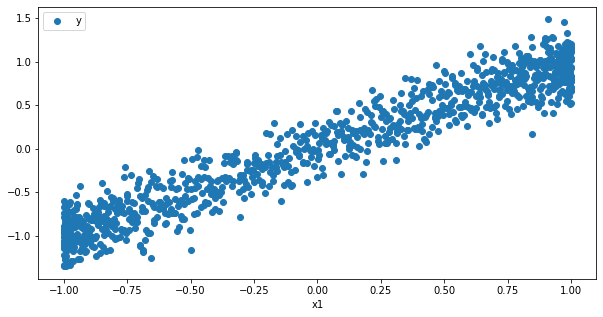

In [2]:
# Since we want a linear model, create a new feature that is similar to the shape of 'x'
df['x1'] = np.sin(df['x'])
df.plot('x1','y', figsize=(10,5), style='o')    

<ipython-input-3-4b3c9fa3fcdc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[X] = scaler.fit_transform(df_train[X].values.reshape(-1, 1))
/home/ejohnson/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/ejohnson/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

Epoch 1/20
21/21 [==============================] - 0s 3ms/step - loss: 0.1224 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0760 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0508 - lr: 0.0010
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0414 - lr: 0.0010
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0385 - lr: 0.0010
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0373 - lr: 0.0010
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0370 - lr: 0.0010
Epoch 8/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0369 - lr: 0.0010
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0368 - lr: 0.0010
Epoch 10/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0368 - lr: 0.0010
Epoch 11/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0368

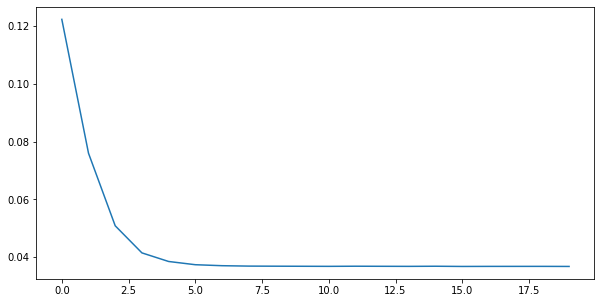

In [3]:
# split the data into train and test sets
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33)

X = ['x1']
y = 'y'

# Scale the data
scaler = sklearn.preprocessing.StandardScaler()
df_train[X] = scaler.fit_transform(df_train[X].values.reshape(-1, 1))
df_test[X] = scaler.transform(df_test[X].values.reshape(-1, 1))

# Now create the Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(len(X), )) 
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 15:
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
history = model.fit(df_train[X], df_train[y], epochs=20, callbacks=[scheduler]) # .reshape(-1, 1)
df_history = pd.DataFrame(history.history)
for metric in ['loss']:
    df_history[metric].plot(figsize=(10,5), label=metric)
    plt.show()

<ipython-input-4-36d1b82dce80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = model.predict(df_test[X])
<ipython-input-4-36d1b82dce80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['residual'] = (df_test['y'] - df_test['y_pred'])


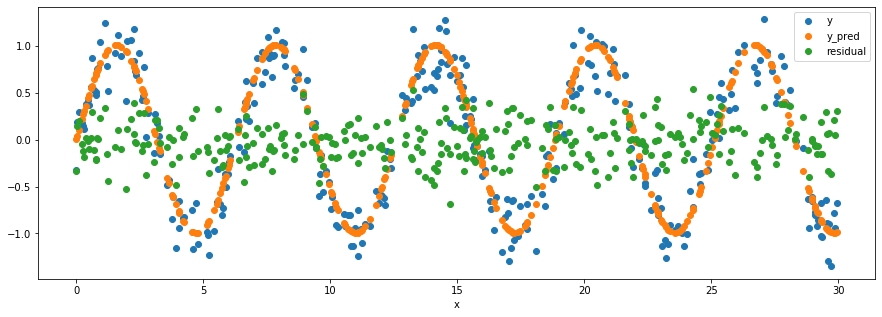

In [4]:
df_test['y_pred'] = model.predict(df_test[X])
df_test['residual'] = (df_test['y'] - df_test['y_pred'])
df_test.plot('x', y=['y', 'y_pred', 'residual'], figsize=(15,5), style='o')

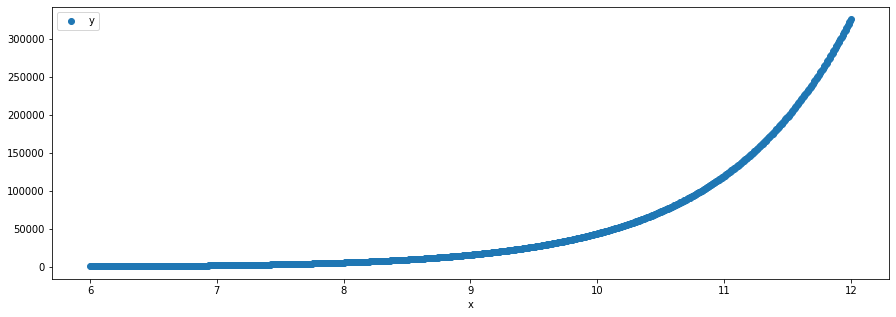

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
import tensorflow as tf

def create_dataframe(start, stop, n_samples):
    # intialise dataframe
    df = pd.DataFrame({
        'x':np.linspace(start, stop, n_samples)
    })
    # create response
    df['y'] = create_exponential_growth_with_noise(a=1, r=2, t=df['x'])
    return df

def create_exponential_growth_with_noise(a, r, t):
    e = np.random.normal(0, 1, len(t))
    return a * r * np.exp(t) + e

df = create_dataframe(6, 12, 1001)
df.plot('x','y', figsize=(15,5), style='o')    

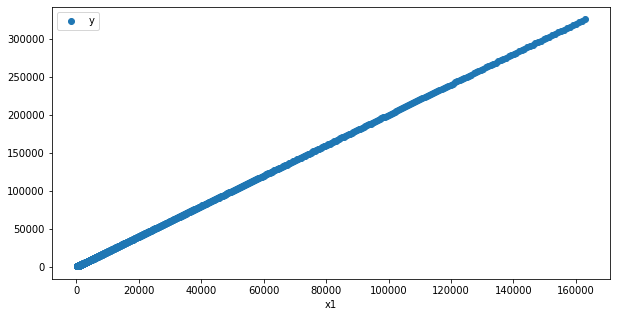

In [6]:
# Since we want a linear model, create a new feature that is similar to the shape of 'x'
df['x1'] = np.exp(df['x'])
df.plot('x1', 'y', figsize=(10,5), style='o')    

<ipython-input-7-4b3c9fa3fcdc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[X] = scaler.fit_transform(df_train[X].values.reshape(-1, 1))
/home/ejohnson/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/ejohnson/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

Epoch 1/20
21/21 [==============================] - 0s 3ms/step - loss: 7863475712.0000 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 3651702528.0000 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 1301871616.0000 - lr: 0.0010
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 445353440.0000 - lr: 0.0010
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 139299344.0000 - lr: 0.0010
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 46327524.0000 - lr: 0.0010
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 14699808.0000 - lr: 0.0010
Epoch 8/20
21/21 [==============================] - 0s 3ms/step - loss: 4808426.5000 - lr: 0.0010
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 1636750.8750 - lr: 0.0010
Epoch 10/20
21/21 [==============================] - 0s 3ms/step - loss: 510704.3438 - lr: 0.0010
Epoch

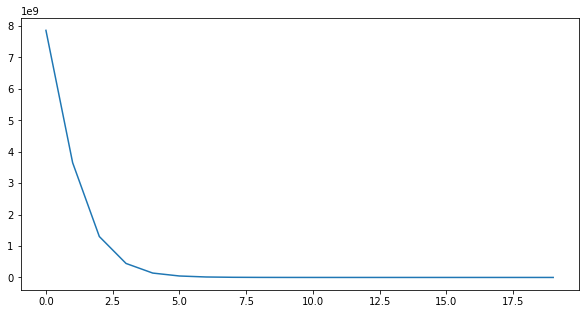

In [7]:
# split the data into train and test sets
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33)

X = ['x1']
y = 'y'

# Scale the data
scaler = sklearn.preprocessing.StandardScaler()
df_train[X] = scaler.fit_transform(df_train[X].values.reshape(-1, 1))
df_test[X] = scaler.transform(df_test[X].values.reshape(-1, 1))

# Now create the Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(len(X), )) 
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 15:
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
history = model.fit(df_train[X], df_train[y], epochs=20, callbacks=[scheduler]) # .reshape(-1, 1)
df_history = pd.DataFrame(history.history)
for metric in ['loss']:
    df_history[metric].plot(figsize=(10,5), label=metric)
    plt.show()

<ipython-input-8-36d1b82dce80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = model.predict(df_test[X])
<ipython-input-8-36d1b82dce80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['residual'] = (df_test['y'] - df_test['y_pred'])


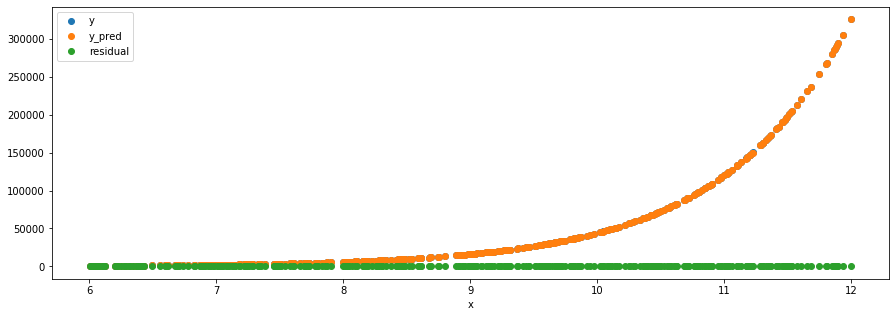

In [8]:
df_test['y_pred'] = model.predict(df_test[X])
df_test['residual'] = (df_test['y'] - df_test['y_pred'])
df_test.plot('x', y=['y', 'y_pred', 'residual'], figsize=(15,5), style='o')